In [1]:
%matplotlib inline 
import numpy  as np
import pandas as pd

# Import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt # Pyplot is such a general function that it deserves its own alias
from pandas.plotting import scatter_matrix

features = ["TimeStamp", "Player" ,"Season", "Top %", "Rank", "LP", "Wins", "Losses"]

df = pd.read_csv('tylersdata.csv', names=features)

# Explore and Clean

In [2]:
df.tail()

,TimeStamp,Player,Season,Top %,Rank,LP,Wins,Losses
2023,2020-11-29 14:25:33.149846,T1+OK+GOOD+YES,10.5,0.68,Diamond 3,25 LP,86W,87L
2024,2020-11-29 14:25:33.735042,S8+IS+SO+FUN,10.5,1.12,Diamond 4,55 LP,355W,382L
2025,2020-11-29 14:55:34.547156,HULKSMASH1337,10.5,0.07,Master,0 LP,485W,412L
2026,2020-11-29 14:55:35.137637,T1+OK+GOOD+YES,10.5,0.68,Diamond 3,25 LP,86W,87L
2027,2020-11-29 14:55:35.980212,S8+IS+SO+FUN,10.5,1.12,Diamond 4,55 LP,355W,382L


In [3]:
df.shape

(2028, 8)

### Strip String Data from Int data

In [4]:
df['LP'] = df['LP'].map(lambda x: x.strip(" LP"))
df['Wins'] = df['Wins'].map(lambda x: x.strip("W"))
df['Losses'] = df['Losses'].map(lambda x: x.strip("L"))

## Fix continuity of old playername assignments

In [5]:
df['Player'] = df['Player'].map(lambda x: x.replace("+", " "))
df['Player'] = df['Player'].map(lambda x: x.strip("T1: "))
df['Player'] = df['Player'].map(lambda x: x.upper())
df = df.replace("OK GOOD YES", "T1 OK GOOD YES")
df['Player'].unique()

array(['HULKSMASH1337', 'S8 IS SO FUN', 'T1 OK GOOD YES'], dtype=object)

## Scraping top % occasionally produces a string with % 

In [6]:
df['Top %'] = df['Top %'].map(lambda x: x.strip("%"))
df['Top %'] = df['Top %'].apply(pd.to_numeric)

### Change Data types

In [7]:
df['Wins'] = df['Wins'].apply(pd.to_numeric)
df['Losses'] = df['Losses'].apply(pd.to_numeric)
df['LP'] = df['LP'].apply(pd.to_numeric)
#categorical
df['Season'] = df['Season'].astype('category')
print("Season Data on:" ,str(df['Season'].unique()).split("\n")[0], "where '.5' indicates pre-season")

Season Data on: [10.0, 10.5] where '.5' indicates pre-season


# Feature Engineer

In [8]:
df['Total Games'] = df['Wins'] + df['Losses']

### Function to Create new feature (Enumerating Rank) => Total LP

In [9]:
divisions = { "1": 300,
          "2": 200,
          "3": 100,
          "4": 0   
}

tiers = { "Iron": 0,
          "Bronze": 400,
          "Silver": 800,
          "Gold": 1200,
          "Platinum": 1600,
          "Diamond": 2000,
          "Master": 2400
}

In [10]:
def totalLP():
    rind = 0
    for rank in df['Rank']:
        a= rank.split()[0]
        if rank == "Master":
            b = "4" #worth 0
        else:
            b= rank.split()[1]
        for tier in tiers:
            for division in divisions:
                if a == tier and b == division:
                    df.loc[rind,'Total LP'] = (tiers.get(a) + divisions.get(b)) + df.loc[rind,'LP']
                    rind += 1                             
totalLP()

In [11]:
#df.head()
df.tail()

,TimeStamp,Player,Season,Top %,Rank,LP,Wins,Losses,Total Games,Total LP
2023,2020-11-29 14:25:33.149846,T1 OK GOOD YES,10.5,0.68,Diamond 3,25,86,87,173,2125.0
2024,2020-11-29 14:25:33.735042,S8 IS SO FUN,10.5,1.12,Diamond 4,55,355,382,737,2055.0
2025,2020-11-29 14:55:34.547156,HULKSMASH1337,10.5,0.07,Master,0,485,412,897,2400.0
2026,2020-11-29 14:55:35.137637,T1 OK GOOD YES,10.5,0.68,Diamond 3,25,86,87,173,2125.0
2027,2020-11-29 14:55:35.980212,S8 IS SO FUN,10.5,1.12,Diamond 4,55,355,382,737,2055.0


In [12]:
#pd.plotting.scatter_matrix(df, alpha = 0.8, figsize=(15,15))

# Split accounts

In [13]:
top = df.loc[df['Player']== "HULKSMASH1337"]
jungle = df.loc[df['Player']== "S8 IS SO FUN"]
smurf = df.loc[df['Player']== "T1 OK GOOD YES"]

# Visualize Accounts

Text(0.5, 1.0, 'Tylers account Games and Total LP [Season10 and Pre]')

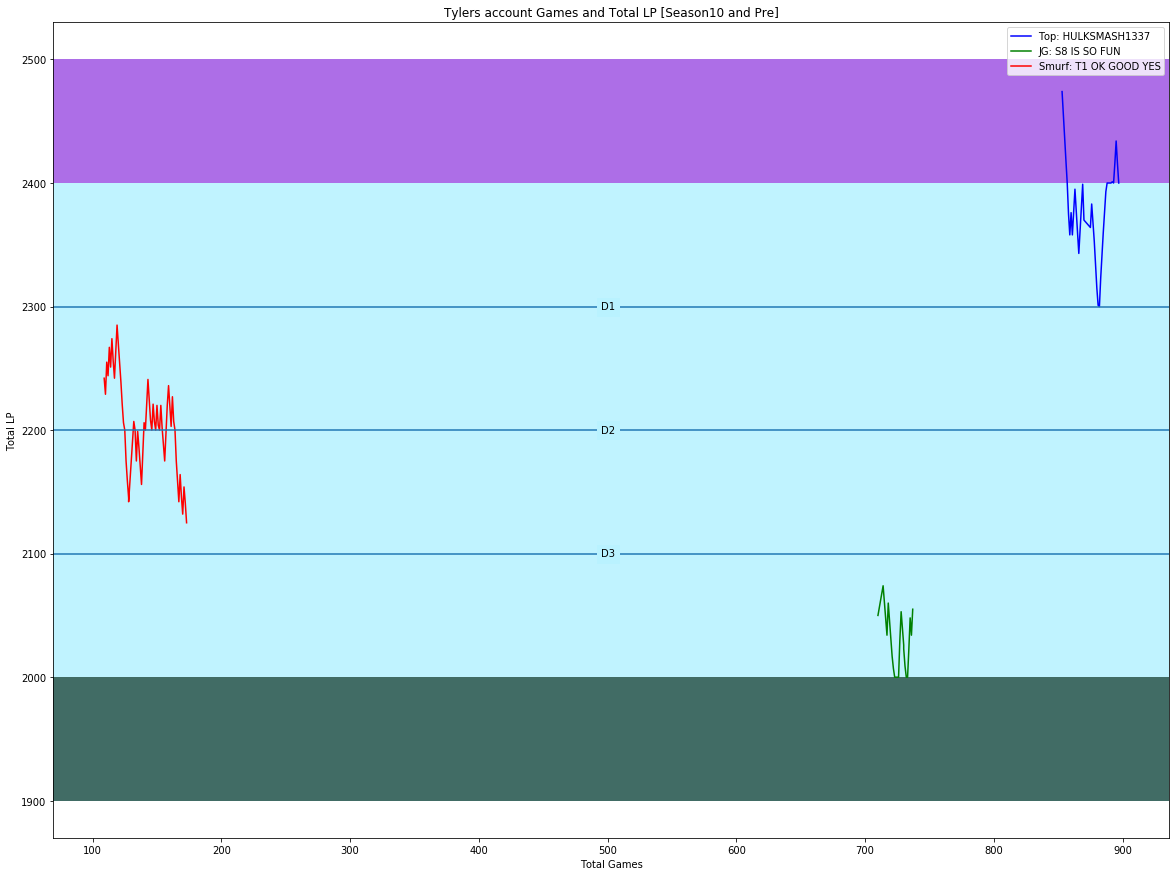

In [14]:
plt.figure(figsize=(20,15))
#Plot Accounts
plt.plot(top['Total Games'], top['Total LP'], color="blue", label="Top: HULKSMASH1337")
plt.plot(jungle['Total Games'], jungle['Total LP'],color="green" , label="JG: S8 IS SO FUN")
plt.plot(smurf['Total Games'], smurf['Total LP'],color="red" , label="Smurf: T1 OK GOOD YES")
#Visualize Tiers & Divisions
plt.axhspan(1900,2000, facecolor='#2c5c54', alpha=0.9) #plat
plt.axhspan(2000,2400, facecolor='#B9F2FF', alpha=0.9) #diamond
plt.text(500, 2100, 'D3', fontsize=10, va='center', ha='center', backgroundcolor='#B9F2FF')
plt.text(500, 2200, 'D2', fontsize=10, va='center', ha='center', backgroundcolor='#B9F2FF')
plt.text(500, 2300, 'D1', fontsize=10, va='center', ha='center', backgroundcolor='#B9F2FF')
plt.axhspan(2400,2500, facecolor='#A45EE5', alpha=0.9) #master
plt.axhline(y=2300)
plt.axhline(y=2200)
plt.axhline(y=2100)
#Text
plt.legend(loc='best')
plt.xlabel("Total Games")
plt.ylabel("Total LP")
plt.title("Tylers account Games and Total LP [Season10 and Pre]")  

### WIP Function that lets you create a plot dependent on what values you'd like to see on X (Time or Season)

In [15]:
def plot_LP(startdate, enddate, accounts, season):
    for account in accounts:
        fig = plt.figure(figsize=[15,10])
        ax = fig.add_subplot(111)
        #Plot Accounts
        ax.plot(account['Total Games'], account['Total LP'], color="blue", )
        
        #Tiers & Divisions
        import math
        minLP= int(math.floor(account['Total LP'].min() /100)*100)
        maxLP= int(math.ceil(account['Total LP'].max() /100)*100) 
        
        for tier in range(minLP,maxLP, 100):
            ax.axhline(tier)
            if tier == 2400:                 #iloc average to place text in middle
                ax.text((account['Total Games'].iloc[0] + account['Total Games'].iloc[-1])/2, tier, 'Master', fontsize=10, va='center', ha='center', backgroundcolor='#A45EE5')
            elif tier % 400 == 0 and tier < 2400:                 #iloc average to place text in middle
                ax.text((account['Total Games'].iloc[0] + account['Total Games'].iloc[-1])/2, tier, '4', fontsize=10, va='center', ha='center', backgroundcolor='#B9F2FF')
            elif tier % 300 == 0:
                ax.text((account['Total Games'].iloc[0] + account['Total Games'].iloc[-1])/2, tier, '3', fontsize=10, va='center', ha='center', backgroundcolor='#B9F2FF')
            elif tier % 200 == 0:
                ax.text((account['Total Games'].iloc[0] + account['Total Games'].iloc[-1])/2, tier, '2', fontsize=10, va='center', ha='center', backgroundcolor='#B9F2FF')
            elif tier % 100 == 0:
                ax.text((account['Total Games'].iloc[0] + account['Total Games'].iloc[-1])/2, tier, '1', fontsize=10, va='center', ha='center', backgroundcolor='#B9F2FF')
        

        #Divide Seasons
        s_11_pre = account.loc[account['Season'].ne(10).idxmax(), 'Total Games']
        ax.axvline(s_11_pre ,c='r', ls='--')
        ax.text(s_11_pre, tier+15, 'PreSeason', rotation=90, fontsize=13)
        
        #Text
        title = account['Player'].iloc[0]
        ax.set_xlabel("Total Games")
        ax.set_ylabel("Total LP")
        ax.set_title(title + "'s Total LP x " + "TotalGames[Season10 and Pre]") #need to add account name in title 

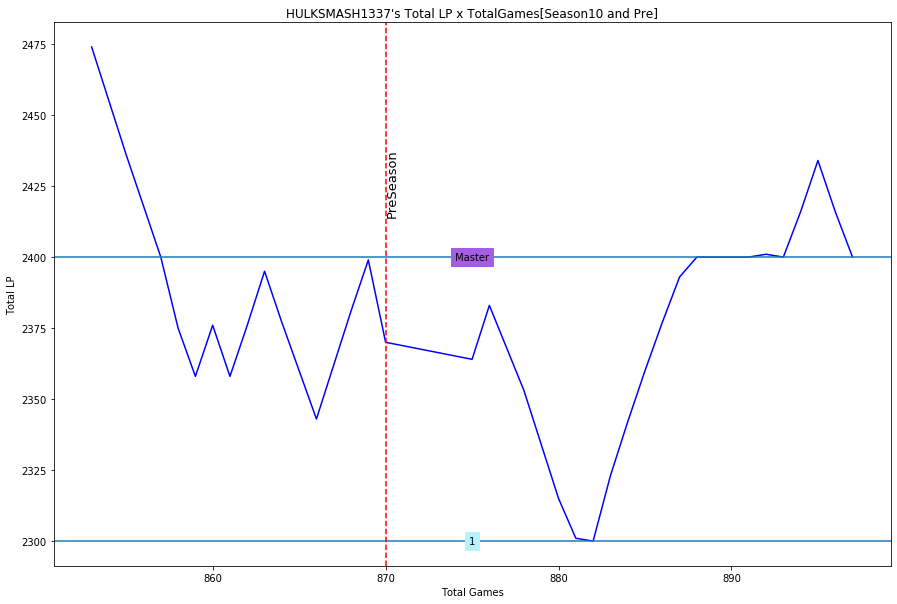

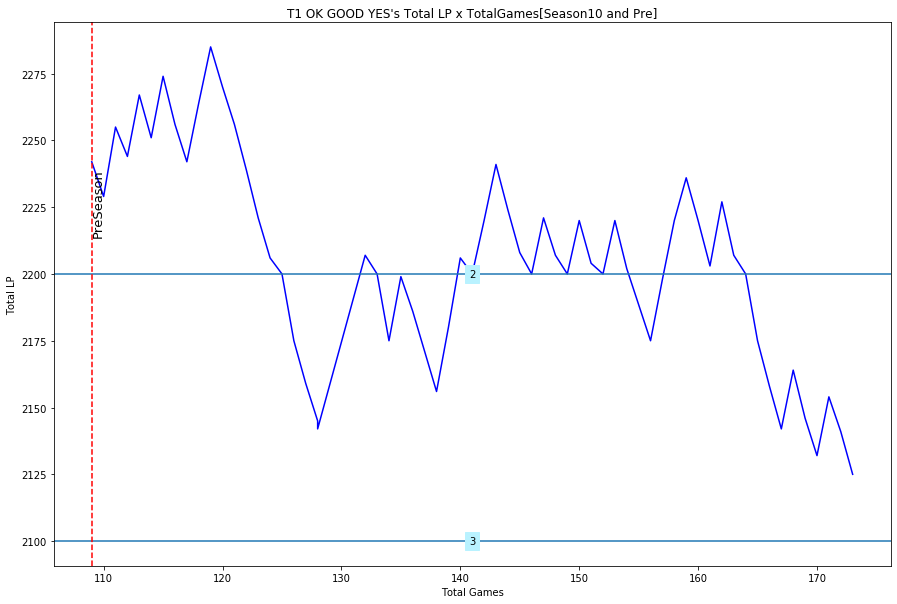

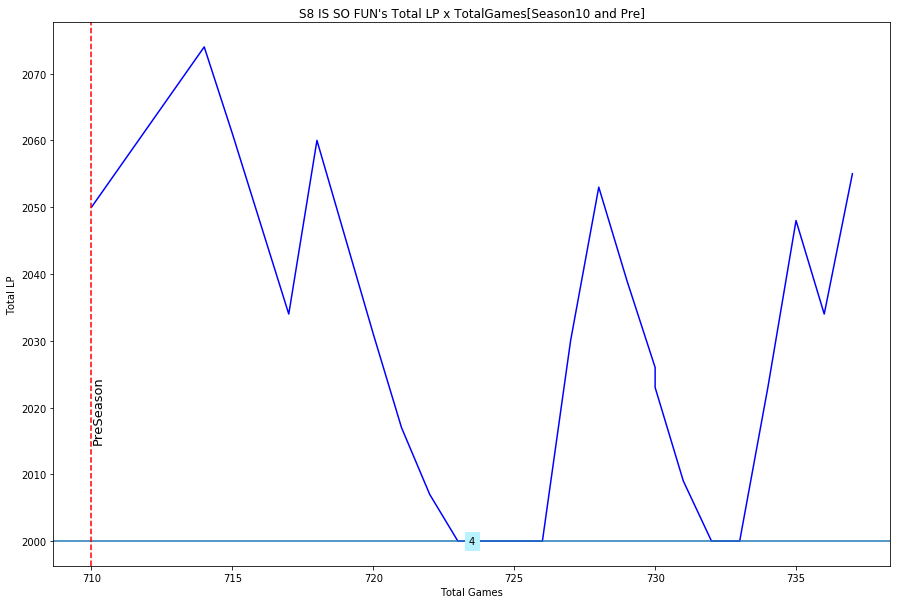

In [20]:
accounts =[top,smurf,jungle]
plot_LP(8,1,accounts,10) # Placeholder values, overload method or... turn dates into tuple, if tuple do dates, if none run total games? 

Text(0.5, 1.0, 'Tylers account % in NA over games played')

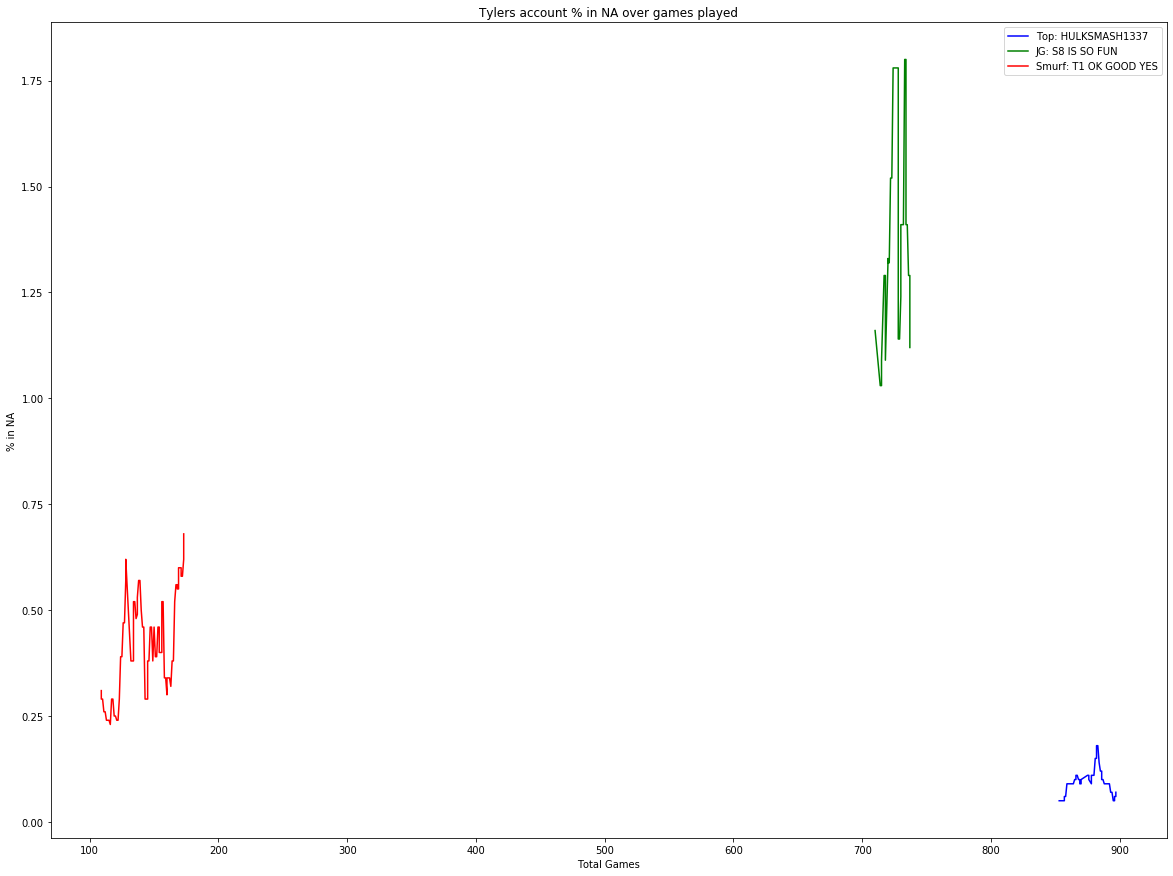

In [17]:
plt.figure(figsize=(20,15))
plt.plot(top['Total Games'], top['Top %'], color="blue", label="Top: HULKSMASH1337")
plt.plot(jungle['Total Games'], jungle['Top %'],color="green" , label="JG: S8 IS SO FUN")
plt.plot(smurf['Total Games'], smurf['Top %'],color="red" , label="Smurf: T1 OK GOOD YES")
plt.legend(loc='best')
plt.xlabel("Total Games")
plt.ylabel("% in NA")
plt.title("Tylers account % in NA over games played")  

## Notes and code for plot functions

In [18]:
#function input pair of dates (start, end) or (season) return graph plotting accounts in that zone.

#Turn the plot above into a function so it can be used by functions as above without repeating code.
#if totalLP> x plot this etc.

Code below adds colour in the plot function depending on 

In [19]:
        #if statements for plotting lowest on graph round tier to lowest 100 and do it above also
        #ax.axhspan(1900,2000, facecolor='#2c5c54', alpha=0.9) #plat
        #ax.axhspan(2000,2400, facecolor='#B9F2FF', alpha=0.9) #diamond
        #ax.axhspan(2400,2500, facecolor='#A45EE5', alpha=0.9) #master
        
        #if statements for plotting lowest on graph round tier to lowest 100 and do it above also
        #if "Master" in str(account['Rank'].values):
            #ax.axhspan(minLP,2500, facecolor='#A45EE5', alpha=0.9) #master
            #if "Diamond" in str(account['Rank'].values):
                #ax.axhspan(minLP,2400, facecolor='#B9F2FF', alpha=0.9) #diamond
                #if "Platinum" in str(account['Rank'].values):
                    #ax.axhspan(1900,2000, facecolor='#2c5c54', alpha=0.9) #plat
                #else:
                    #pass
            